In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def draw_rectangle(ax, corner1, corner2, color, lw, zorder):
    """
    Draws a rectangle on the specified axis given the coordinates of the corners and the color of the line.
    
    Arguments:
    ax -- The matplotlib axis to draw the plot on.
    corner1 -- Tuple (x1, y1) representing the coordinates of the first corner.
    corner2 -- Tuple (x2, y2) representing the coordinates of the second corner.
    color -- String representing the color of the line.
    """
    # Calculate the width and height of the rectangle
    width = abs(corner2[0] - corner1[0])
    height = abs(corner2[1] - corner1[1])

    # Create a rectangle patch with the given coordinates and color
    rect = patches.Rectangle(corner1, width, height, linewidth=lw, ls=':', edgecolor=color,
                             facecolor='none', zorder=zorder)

    # Add the rectangle patch to the axes
    ax.add_patch(rect)

    # Set the x and y axis limits based on the corner coordinates
    ax.set_xlim(min(corner1[0], corner2[0]), max(corner1[0], corner2[0]))
    ax.set_ylim(min(corner1[1], corner2[1]), max(corner1[1], corner2[1]))

    # If the axes are not shared, set the aspect ratio to 'equal'
    if not ax.get_shared_x_axes().joined and not ax.get_shared_y_axes().joined:
        ax.set_aspect('equal')

In [3]:
diri = ''
fili = 'imerg7.2000.2023.15NS.wk_spectra.nc'

f = xr.open_dataset(diri+fili)
f

/home/athul/anaconda3v2/envs/renv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


<xarray.Dataset>
Dimensions:     (frequency: 86, wavenumber: 51)
Coordinates:
  * frequency   (frequency) float64 0.01042 0.02083 0.03125 ... 0.8854 0.8958
  * wavenumber  (wavenumber) float64 -25.0 -24.0 -23.0 -22.0 ... 23.0 24.0 25.0
Data variables:
    psumanti    (frequency, wavenumber) float64 ...
    psumsym     (frequency, wavenumber) float64 ...
    psumb       (frequency, wavenumber) float64 ...
    psumanti_r  (frequency, wavenumber) float64 ...
    psumsym_r   (frequency, wavenumber) float64 ...

In [4]:
pi = np.pi
g = 9.81
beta = 2.28e-11
re = 6.37e6
omega = 7.292e-05
perimeter = 2.*pi*re

wavenumber = f.wavenumber
freq = f.frequency
wn = np.linspace(-20,20,201)
wn = np.where(wn!=0, wn, 1e-20)
wavelength = perimeter/wn
k = 2.*pi/wavelength

In [5]:
w_rossby1_10 = np.empty(shape=len(k),dtype=float)
w_rossby1_100 = np.empty(shape=len(k),dtype=float)
w_rossby2_10 = np.empty(shape=len(k),dtype=float)
w_rossby2_100 = np.empty(shape=len(k),dtype=float)

w_kel_10 = np.empty(shape=len(k),dtype=float)
w_kel_100 = np.empty(shape=len(k),dtype=float)

w_mrg_10 = np.empty(shape=len(k),dtype=float)
w_mrg_100 = np.empty(shape=len(k),dtype=float)

w_ig1_10 = np.empty(shape=len(k),dtype=float)
w_ig1_100 = np.empty(shape=len(k),dtype=float)
w_ig2_10 = np.empty(shape=len(k),dtype=float)
w_ig2_100 = np.empty(shape=len(k),dtype=float)

In [6]:
# ed = [8,90]
ed = [1,58]

for i in range(len(k)):
    
#     w_ig1_10[i] = ( (3 * beta * (g*ed[0])**0.5) + k[i]**2 * (g*ed[0]) )**0.5
#     w_ig1_100[i] = ( (3 * beta * (g*ed[1])**0.5) + k[i]**2 * (g*ed[1]) )**0.5
#     w_ig2_10[i] = ( (5 * beta * (g*ed[0])**0.5) + k[i]**2 * (g*ed[0]) )**0.5
#     w_ig2_100[i] = ( (5 * beta * (g*ed[1])**0.5) + k[i]**2 * (g*ed[1]) )**0.5


# The steps in the loop is to adjust the frequency to induce asymmetry similar to theory

    w_ig1_10[i] = ( (3 * beta * (g*ed[0])**0.5) + (k[i]**2 * (g*ed[0])) )**0.5
#     del  = (Beta*sqrt(g*he))
#     deif = sqrt((2.*n+1.)*del + (g*he)*k^2) # this is w_ig1_10
    for j in range(5):
        w_ig1_10[i] = np.sqrt((3)*beta*np.sqrt(g*ed[0]) + (g*ed[0])*k[i]**2 + g*ed[0]*beta*k[i]/w_ig1_10[i])
   ####################### 
    w_ig1_100[i] = ( (3 * beta * (g*ed[1])**0.5) + (k[i]**2 * (g*ed[1])) )**0.5
#     del  = (Beta*sqrt(g*he))
#     deif = sqrt((2.*n+1.)*del + (g*he)*k^2) # this is w_ig1_10
    for j in range(5):
        w_ig1_100[i] = np.sqrt((3)*beta*np.sqrt(g*ed[1]) + (g*ed[1])*k[i]**2 + g*ed[1]*beta*k[i]/w_ig1_100[i])
    ######################
    w_ig2_10[i] = ( (5 * beta * (g*ed[0])**0.5) + (k[i]**2 * (g*ed[0])) )**0.5
#     del  = (Beta*sqrt(g*he))
#     deif = sqrt((2.*n+1.)*del + (g*he)*k^2) # this is w_ig1_10
    for j in range(5):
        w_ig2_10[i] = np.sqrt((5)*beta*np.sqrt(g*ed[0]) + (g*ed[0])*k[i]**2 + g*ed[0]*beta*k[i]/w_ig2_10[i])
    ######################
    w_ig2_100[i] = ( (5 * beta * (g*ed[1])**0.5) + (k[i]**2 * (g*ed[1])) )**0.5
#     del  = (Beta*sqrt(g*he))
#     deif = sqrt((2.*n+1.)*del + (g*he)*k^2) # this is w_ig1_10
    for j in range(5):
        w_ig2_100[i] = np.sqrt((5)*beta*np.sqrt(g*ed[1]) + (g*ed[1])*k[i]**2 + g*ed[1]*beta*k[i]/w_ig2_100[i])
    ######################
    
    if k[i]>0:
        w_kel_10[i] = k[i] * (g*ed[0])**0.5
        w_kel_100[i] = k[i] * (g*ed[1])**0.5
        
        w_rossby1_10[i] = np.nan
        w_rossby1_100[i] = np.nan
        w_rossby2_10[i] = np.nan
        w_rossby2_100[i] = np.nan
        
        w_mrg_10[i] = k[i] * (g*ed[0])**0.5 * ( 0.5 + 0.5 * ( 1 + 4 * beta / ( k[i]**2 * (g*ed[0])**0.5 ) )**0.5 )
        w_mrg_100[i] = k[i] * (g*ed[1])**0.5 * ( 0.5 + 0.5 * ( 1 + 4 * beta / ( k[i]**2 * (g*ed[1])**0.5 ) )**0.5 )
        
#         w_ig1_10[i] = ( 3 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig1_100[i] = ( 3 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5
#         w_ig2_10[i] = ( 5 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig2_100[i] = ( 5 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5
        
        
        
    elif k[i]==0:
        w_kel_10[i] = k[i] * (g*ed[0])**0.5
        w_kel_100[i] = k[i] * (g*ed[1])**0.5
        
        w_rossby1_10[i] = np.nan#-beta * k[i] / (k[i] ** 2 + 3. * beta / (g*ed[0])**0.5)
        w_rossby1_100[i] = np.nan#-beta * k[i] / (k[i] ** 2 + 3. * beta / (g*ed[1])**0.5) 
        w_rossby2_10[i] = np.nan#-beta * k[i] / (k[i] ** 2 + 5. * beta / (g*ed[0])**0.5)
        w_rossby2_100[i] = np.nan#-beta * k[i] / (k[i] ** 2 + 5. * beta / (g*ed[1])**0.5)
        
        w_mrg_10[i] = (beta * (g*ed[0])**0.5) ** 0.5
        w_mrg_100[i] =(beta * (g*ed[1])**0.5) ** 0.5
        
#         w_ig1_10[i] = ( 3 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig1_100[i] = ( 3 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5
#         w_ig2_10[i] = ( 5 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig2_100[i] = ( 5 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5
             
#     if k<0    
    else:   
        w_kel_10[i] = np.nan
        w_kel_100[i] = np.nan
        
        w_rossby1_10[i] = -beta * k[i] / (k[i] ** 2 + 3. * beta / (g*ed[0])**0.5)
        w_rossby1_100[i] = -beta * k[i] / (k[i] ** 2 + 3. * beta / (g*ed[1])**0.5)
        w_rossby2_10[i] = -beta * k[i] / (k[i] ** 2 + 5. * beta / (g*ed[0])**0.5)
        w_rossby2_100[i] = -beta * k[i] / (k[i] ** 2 + 5. * beta / (g*ed[1])**0.5)
        
        w_mrg_10[i] = k[i] * (g*ed[0])**0.5 * ( 0.5 - 0.5 * ( 1 + 4 * beta / ( k[i]**2 * (g*ed[0])**0.5 ) )**0.5 )
        w_mrg_100[i] = k[i] * (g*ed[1])**0.5 * ( 0.5 - 0.5 * ( 1 + 4 * beta / ( k[i]**2 * (g*ed[1])**0.5 ) )**0.5 )
        
#         w_ig1_10[i] = ( 3 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig1_100[i] = ( 3 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5
#         w_ig2_10[i] = ( 5 * beta * (g*ed[0])**0.5 + k[i]**2 * (g*ed[0]) )**0.5
#         w_ig2_100[i] = ( 5 * beta * (g*ed[1])**0.5 + k[i]**2 * (g*ed[1]) )**0.5


# disp1_10 = w_ig1_10**3-g*ed[0]*(k**2+(beta*(2.*1+1.)/np.sqrt(g*ed[0])))*w_ig1_10-k*beta*g*ed[0]
# disp1_100 = w_ig1_100**3-g*ed[1]*(k**2+(beta*(2.*1+1.)/np.sqrt(g*ed[1])))*w_ig1_100-k*beta*g*ed[1]

# disp2_10 = w_ig2_10**3-g*ed[0]*(k**2+(beta*(2.*2+1.)/np.sqrt(g*ed[0])))*w_ig2_10-k*beta*g*ed[0]
# disp2_100 = w_ig2_100**3-g*ed[0]*(k**2+(beta*(2.*2+1.)/np.sqrt(g*ed[1])))*w_ig2_100-k*beta*g*ed[1]
        

In [7]:
# scale all k and freqs to non-dimensionalise
# convert freq. to cycles per day (CPD) from SI units

he = 100e3

k = k*(np.sqrt(g*he)/beta)**0.5

# w_kel_10 = w_kel_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_kel_100 = w_kel_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))

# w_rossby1_10 = w_rossby1_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_rossby1_100 = w_rossby1_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_rossby2_10 = w_rossby2_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_rossby2_100 = w_rossby2_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))

# w_mrg_10 = w_mrg_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_mrg_100 = w_mrg_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))

# w_ig1_10 = w_ig1_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_ig1_100 = w_ig1_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_ig2_10 = w_ig2_10/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))
# w_ig2_100 = w_ig2_100/(beta*np.sqrt(g*he))**0.5*(86400/(2*pi))

w_kel_10 = w_kel_10*(86400/(2*pi))
w_kel_100 = w_kel_100*(86400/(2*pi))

w_rossby1_10 = w_rossby1_10*(86400/(2*pi))
w_rossby1_100 = w_rossby1_100*(86400/(2*pi))
w_rossby2_10 = w_rossby2_10*(86400/(2*pi))
w_rossby2_100 = w_rossby2_100*(86400/(2*pi))

w_mrg_10 = w_mrg_10*(86400/(2*pi))
w_mrg_100 = w_mrg_100*(86400/(2*pi))

w_ig1_10 = w_ig1_10*(86400/(2*pi))
w_ig1_100 = w_ig1_100*(86400/(2*pi))
w_ig2_10 = w_ig2_10*(86400/(2*pi))
w_ig2_100 = w_ig2_100*(86400/(2*pi))

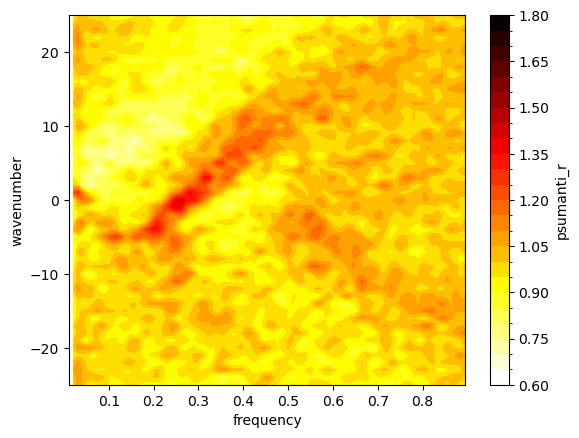

In [8]:
f.psumanti_r.transpose().plot.contourf(cmap='hot_r', levels=np.arange(0.6, 1.85, 0.05))

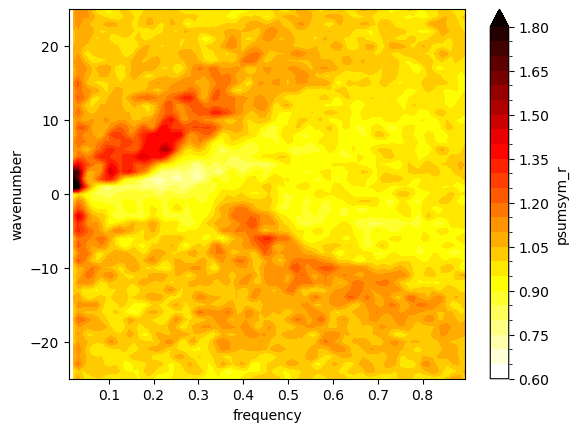

In [9]:
f.psumsym_r.transpose().plot.contourf(cmap='hot_r', levels=np.arange(0.6, 1.85, 0.05))

In [10]:
asymm = np.where(f.psumanti_r>=0.6, f.psumanti_r, np.nan)
symm  = np.where(f.psumsym_r>=0.6, f.psumsym_r, np.nan)

/tmp/ipykernel_1579360/2422055712.py:146: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax12.set_yticklabels(inverse_ticks)


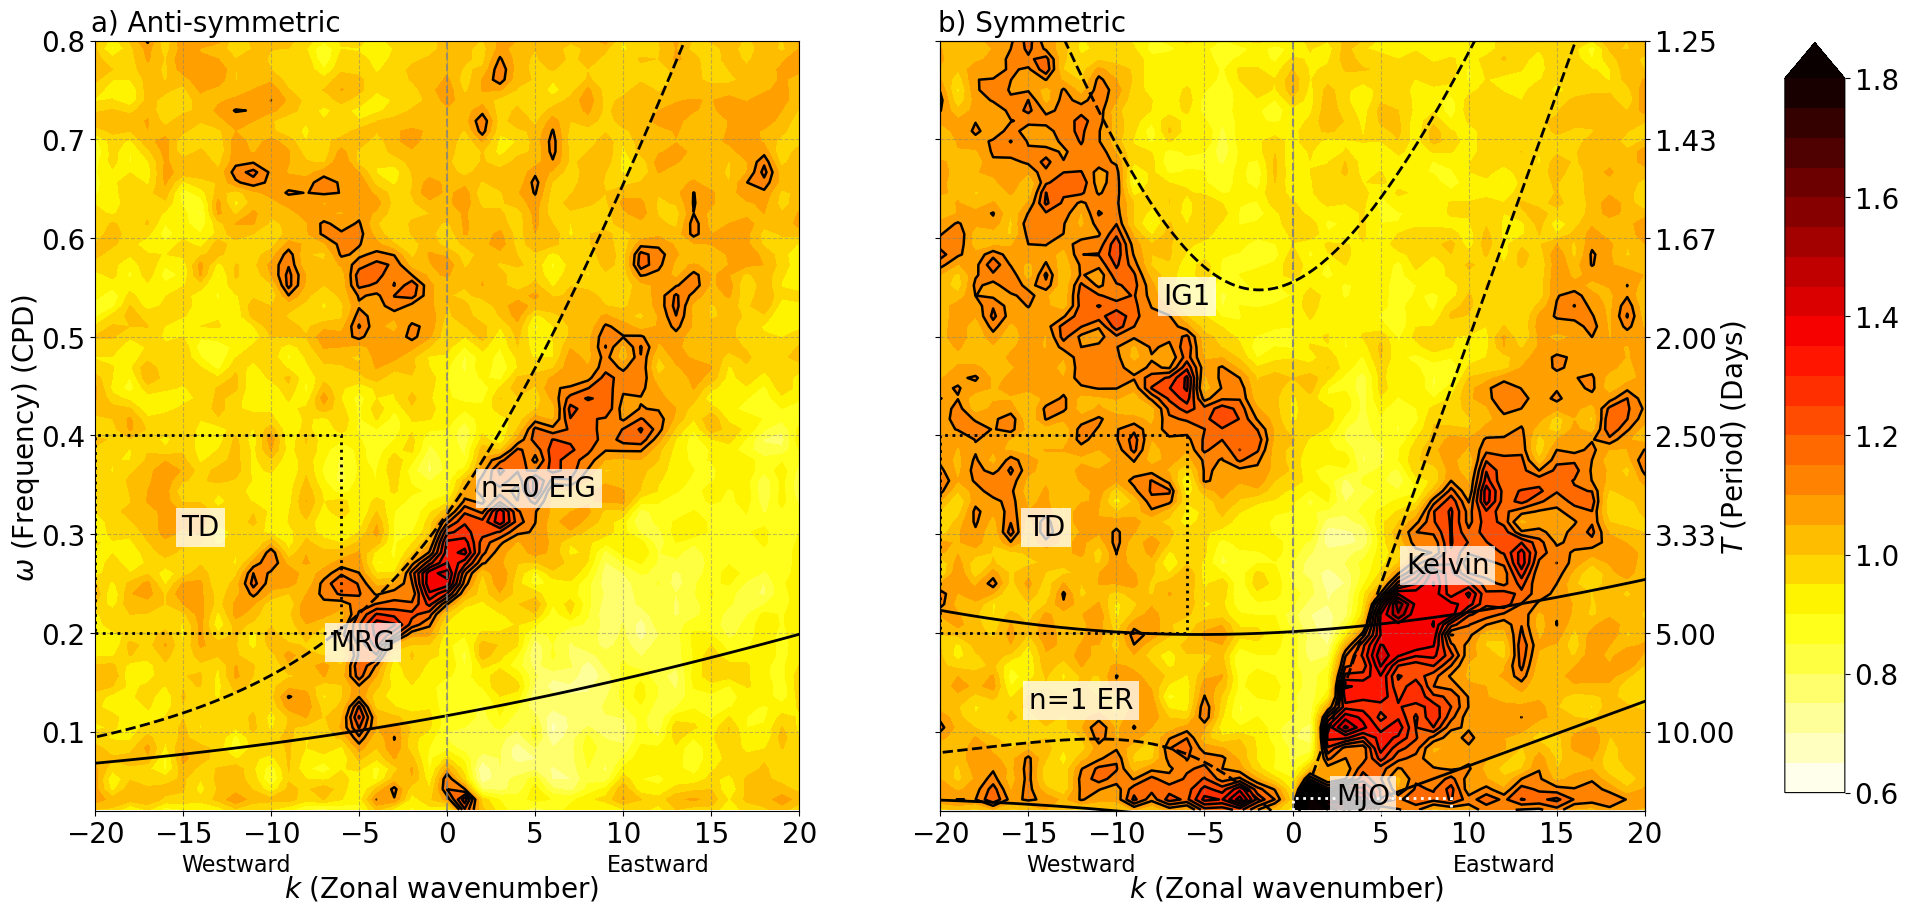

In [12]:
# fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,20), sharey=True, sharex=True)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True, sharex=True)

ax1, ax2 = axs.flatten()



dispersion_color = 'black'
clb_orient = 'vertical'
clb_pad = 0.01
clb_lab_frac = 0.014
wave_font_size=20
font_size=20
lw = 2.0

# Anti-symmetric waves: MRG, EIG, TD

cmap = 'hot_r'#'Greys'
levels = np.arange(0.6, 1.85, 0.05)
min_contour_range_lines = 1.1
contour_range_lines = levels[levels>=min_contour_range_lines]

X, Y = np.meshgrid(wavenumber, freq)

cp1 = ax1.contourf(X, Y, asymm, cmap=cmap, levels=levels, extend='max')
cp11 = ax1.contour(X, Y, asymm, levels=contour_range_lines, colors='black', linewidths=1.8)
# clb1 = fig.colorbar(cp1, orientation=clb_orient, ax=ax1, pad=clb_pad, fraction=clb_lab_frac)

# MRG
ax1.plot(k[k<=0], w_mrg_10[k<=0],c=dispersion_color,ls='-',lw=lw)
ax1.plot(k[k<=0], w_mrg_100[k<=0],c=dispersion_color,ls='--',lw=lw)
# EIG0
ax1.plot(k[k>=0], w_mrg_10[k>=0],c=dispersion_color,ls='-',lw=lw)
ax1.plot(k[k>=0], w_mrg_100[k>=0],c=dispersion_color,ls='--',lw=lw)
# TD
draw_rectangle(ax1, (-20,0.2), (-6,0.4), dispersion_color, lw=lw, zorder=10)


ax1.axvline(x=0.0, linestyle='--', color='grey', alpha=0.75)

# ax11 = ax1.twinx()

ax1.text(-0.075, 0.485, r'$\omega $ (Frequency) (CPD)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax1.transAxes, fontsize=font_size)
# ax11.text(1.15, 0.485, '$T$ (Period) (Days)', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax11.transAxes, fontsize=font_size)
ax1.text(0.5, -0.12, '$k$ (Zonal wavenumber)  ', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes,  fontsize=font_size)

ax1.set_xlim(xmin = -20, xmax = 20)
ax1.set_ylim(ymin = 0.02, ymax = 0.8)

# ax11.set_ylim(ax1.get_ylim())
inverse_ticks = []
label_format = '%.2f'
for tick in ax1.get_yticks():
    if tick != 0:
        tick = 1/tick
    else:
        tick = np.nan
    inverse_ticks.append(label_format % (tick,))
inverse_ticks[0] = ''
# ax11.set_yticklabels(inverse_ticks)

# ax1.set_ylim(ymin = 1./0.8e5)
ax1.tick_params(axis='both', which='major', labelsize=font_size)
# ax11.tick_params(axis='both', which='major', labelsize=font_size)

ax1.text(0.172, 1.0045, 'a) Anti-symmetric', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes, fontsize=font_size, zorder=10, color=dispersion_color)
ax1.text(0.20, -0.085, 'Westward', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', alpha=1.0, 
        transform=ax1.transAxes, fontsize=font_size-4, zorder=10, color=dispersion_color)
ax1.text(0.80, -0.085, 'Eastward', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', alpha=1.0,
        transform=ax1.transAxes, fontsize=font_size-4, zorder=10, color=dispersion_color);

ax1.text(0.38, 0.20, 'MRG', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes, fontsize=wave_font_size,color=dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax1.text(0.15, 0.35, 'TD', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes, fontsize=wave_font_size,color=dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax1.text(0.63, 0.40, 'n=0 EIG', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax1.transAxes, fontsize=wave_font_size,color = dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})

ax1.grid(axis='both', ls='--', color='grey', alpha=0.5)

# Symmetric waves     : Kelvin, ER, MJO, IG1

cp2 = ax2.contourf(X, Y, symm, cmap=cmap, levels=levels, extend='max')
cp21 = ax2.contour(X, Y, symm, levels=contour_range_lines, colors='black', linewidths=1.8)
# clb2=fig.colorbar(cp2, orientation=clb_orient, ax=ax2, pad=clb_pad, fraction=clb_lab_frac)

# Kelvin
ax2.plot(k, w_kel_10,c=dispersion_color,ls='-',lw=lw) 
ax2.plot(k, w_kel_100,c=dispersion_color,ls='--',lw=lw)
# ER
ax2.plot(k, w_rossby1_10,c=dispersion_color,ls='-',lw=lw)
ax2.plot(k, w_rossby1_100,c=dispersion_color,ls='--',lw=lw)
# IG1
ax2.plot(k, w_ig1_10,c=dispersion_color,ls='-',lw=lw)
ax2.plot(k, w_ig1_100,c=dispersion_color,ls='--',lw=lw)
# MJO
draw_rectangle(ax2, (0,0.02), (9,0.033), 'white', lw, zorder=10)
draw_rectangle(ax2, (-20,0.2), (-6,0.4), dispersion_color, lw=lw, zorder=10)

ax2.axvline(x=0.0, linestyle='--', color='grey', alpha=0.9)

ax12 = ax2.twinx()
# ax1.invert_yaxis()

# ax2.set_yticklabels(y_ticks, rotation=0, fontsize=20)
# ax12.set_yticklabels(y1_ticks, rotation=0, fontsize=20)
# ax2.text(-0.075, 0.485, r'$\omega $ (Frequency) (CPD)', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax2.transAxes, fontsize=font_size)
ax12.text(1.15, 0.485, '$T$ (Period) (Days)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax12.transAxes, fontsize=font_size)
ax2.text(0.5, -0.12, '$k$ (Zonal wavenumber)  ', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes,  fontsize=font_size)

ax2.set_xlim(xmin = -20, xmax = 20)
ax2.set_ylim(ymin = 0.02, ymax = 0.8)

ax12.set_ylim(ax2.get_ylim())
inverse_ticks = []
label_format = '%.2f'
for tick in ax2.get_yticks():
    if tick != 0:
        tick = 1/tick
    else:
        tick = np.nan
    inverse_ticks.append(label_format % (tick,))
inverse_ticks[0] = ''
ax12.set_yticklabels(inverse_ticks)

# ax12.set_ylim(ymin = 1./0.8e5)
ax2.tick_params(axis='both', which='major', labelsize=font_size)
ax12.tick_params(axis='y', which='major', labelsize=font_size)


ax2.text(0.13, 1.0045, 'b) Symmetric', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=font_size, zorder=10, color=dispersion_color)
ax2.text(0.20, -0.085, 'Westward', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', alpha=1,
        transform=ax2.transAxes, fontsize=font_size-4, zorder=10, color=dispersion_color)
ax2.text(0.80, -0.085, 'Eastward', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', alpha=1,
        transform=ax2.transAxes, fontsize=font_size-4, zorder=10, color=dispersion_color);

ax2.text(0.72, 0.30, 'Kelvin', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=wave_font_size,color = dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax2.text(0.60, 0.001, 'MJO', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=wave_font_size,color = dispersion_color, zorder=11,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax2.text(0.20, 0.125, 'n=1 ER', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=wave_font_size,color = dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax2.text(0.15, 0.35, 'TD', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=wave_font_size,color=dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})
ax2.text(0.35, 0.65, 'IG1',va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax2.transAxes, fontsize=wave_font_size,color = dispersion_color,
        bbox={'facecolor':'white','alpha':0.75,'edgecolor':'none'})

ax2.grid(axis='both', ls='--', color='grey', alpha=0.5)
####################################################################
# cbar_ax = fig.add_axes([0.4935, 0.118, 0.020, 0.750])  #[x_pos, y_pos, width, height] # for 1x2 h.plots
cbar_ax = fig.add_axes([0.97, 0.128, 0.030, 0.750])  #[x_pos, y_pos, width, height] # for 2x1 v.plots
# cbar_ax = fig.add_axes([0.14, 0.494, 0.75, 0.020])  #[x_pos, y_pos, width, height] # for 2 v.plots with h cbar
clb = fig.colorbar(cp1,orientation=clb_orient,cax=cbar_ax, 
                   pad=clb_pad,extend='both',fraction=clb_lab_frac, ticks=levels[::4])
clb.ax.tick_params(labelsize=wave_font_size)
# clb.set_label('',size=16)

fig.subplots_adjust(hspace=0.1)
# fig.subplots_adjust(wspace=-0.69)

# plt.tight_layout()
